In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [8]:
# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target


In [9]:

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs=20, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create the custom KerasRegressor
model = KerasRegressorWrapper(build_fn=build_model, epochs=3, batch_size=32, verbose=0)

# Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)


129/129 [==============================] - 0s 1ms/step


In [10]:

# Calculate the average MSE across the folds
average_mse = np.mean(mse_scores)
print(f'Average MSE from K-Fold Cross-Validation: {average_mse}')



Average MSE from K-Fold Cross-Validation: 0.3795443079188627


645/645 [==============================] - 1s 1ms/step


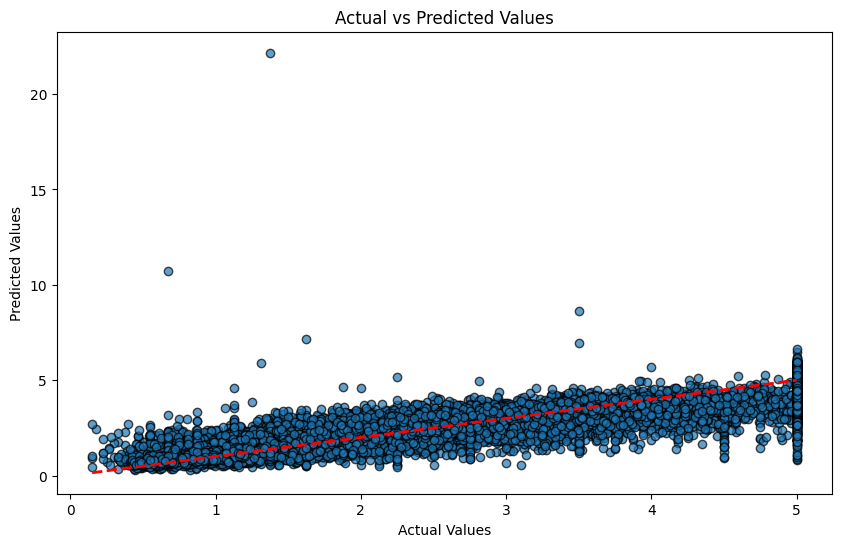

In [11]:
# Visualize the data points and predictions
y_pred = model.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [12]:
# Example: Predicting a value for a single data point
single_data_point = X_scaled[0].reshape(1, -1)  # Take the first data point as an example
single_prediction = model.predict(single_data_point)
print(f'Prediction for single data point: {single_prediction[0][0]}')

1/1 [==============================] - 0s 66ms/step
Prediction for single data point: 4.167972087860107
